In [71]:
import numpy as np
import matplotlib.pyplot as plt

# make dataset

In [2]:
from sklearn.datasets import make_blobs

In [62]:
x,y=make_blobs(n_samples=1000,n_features=2,centers=5,random_state=8)

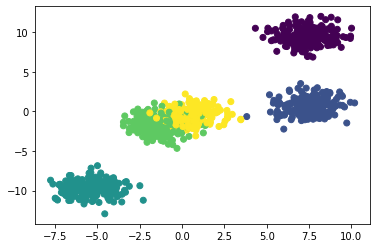

In [63]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

# K Means

## Step1-Initialize

In [5]:
x.shape # x and y coordinate for 1000 data points

(1000, 2)

In [64]:
k=5
colors=['red','green','yellow','magenta','blue']
cluster={}
points=[]

for i in range(k):
    
    #initialize center randomly
    center=10*(2*(np.random.random(x.shape[1],))-1) #range from -10 to 10
    
    cluster[i]={
        'center': center,
        'points': points,
        'color': colors[i]
    }

In [23]:
def dist(v1,v2):
    return np.sqrt(np.sum(v1-v2)**2)

## Step2- Assign every data point to one of the clusters

In [24]:
def assign_pts_to_clusters(cluster):
    
    for i in range(x.shape[0]):
        d=[]
        
        for kx in range(k):
            d.append(dist(x[i],cluster[kx]['center']))
        
        #finding min distance
        cur_cluster=np.argmin(d)
        cluster[cur_cluster]['points'].append(x[i])

## Step2- Update center acc to mean value of data points (M-step)

In [25]:
def update_center(cluster):
    
    for i in range(k):
        
        pts=np.array(cluster[i]['points'])
        
        if pts.shape[0]>0:
            um=pts.mean(axis=0)

            #update center
            cluster[i]['center']=um
            cluster[i]['points']=[] #clear the list

In [37]:
def plot_clusters(cluster):
    
    for i in range(k):
        
        pts=np.array(cluster[i]['points'])
        
        try:
            plt.scatter(pts[:,0],pts[:,1],c=cluster[i]['color'])
        except:
            pass
        
        #plot cluster center
        uk=cluster[i]['center']
        plt.scatter(uk[0],uk[1],c='black',marker='*')

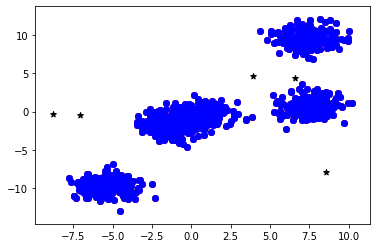

In [65]:
assign_pts_to_clusters(cluster)
plot_clusters(cluster)

In [66]:
for i in range(400):
    assign_pts_to_clusters(cluster)
    update_center(cluster)

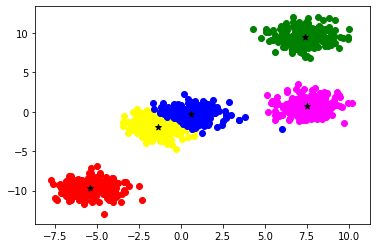

In [67]:
assign_pts_to_clusters(cluster)
plot_clusters(cluster)

In [74]:
from sklearn.datasets import make_moons

In [77]:
x,y=make_moons(n_samples=200, noise=0.1)

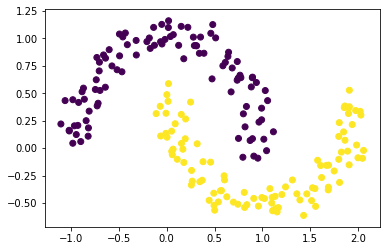

In [78]:
plt.scatter(x[:,0],x[:,1],c=y)

In [79]:
from sklearn.cluster import KMeans

In [80]:
km=KMeans(n_clusters=2)

In [81]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [82]:
center=km.cluster_centers_
labels=km.labels_

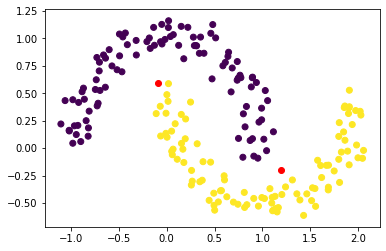

In [83]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(center[0],center[1],c='red')

# DBSCAN

In [84]:
from sklearn.cluster import DBSCAN

In [85]:
dbs=DBSCAN(eps=0.2,min_samples=5)
dbs.fit(x)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [88]:
ybs=dbs.fit_predict(x)

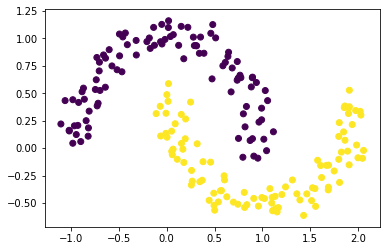

In [90]:
plt.scatter(x[:,0],x[:,1],c=ybs)